In [2]:
import numpy as np
from numpy.typing import ArrayLike
from scipy import integrate
from matplotlib import pyplot as plt

np.random.seed(0)
plt.rc('font', size=8)
plt.rc('figure', titlesize=10)
plt.rc('axes', titlesize=10, labelsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('legend', fontsize=8)

### 1.b

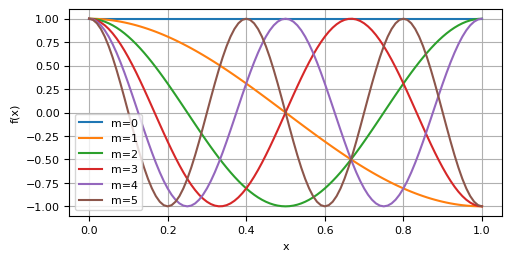

In [3]:
# Plot orthogonal cosine basis functions
x_vec = np.arange(0, 1.01, 0.01)
fig, ax = plt.subplots(figsize=(5, 2.5), layout='constrained')
for m in range(6):
    y_vec = np.cos(np.pi * m * x_vec)
    ax.plot(x_vec, y_vec, label=f'm={m}')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True)
fig.savefig('1bfig1.png', dpi=300)
plt.show()

In [4]:
# Compute inner product of cosine basis functions
mn_pairs = [(1, 4), (2, 6), (3, 15)]
for m, n in mn_pairs:
    x = np.arange(0, 1.01, 0.01)
    f = np.sin(m * np.pi * x)
    g = np.sin(n * np.pi * x)
    inner_prod = integrate.trapezoid(y=f*g, x=x)
    print(f"Inner product of m={m} and n={n} is: {inner_prod}")

Inner product of m=1 and n=4 is: -1.0963994469259664e-17
Inner product of m=2 and n=6 is: -1.3227266504323154e-17
Inner product of m=3 and n=15 is: -2.439454888092385e-18


### 3.a

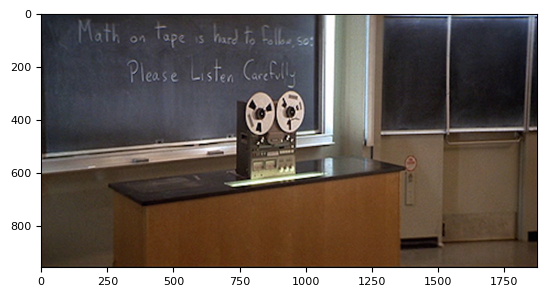

In [ ]:
from skimage.color import rgb2gray

# Read image:
B = plt.imread("recorder.jpg")

# Convert to grayscale:
B = rgb2gray(B)

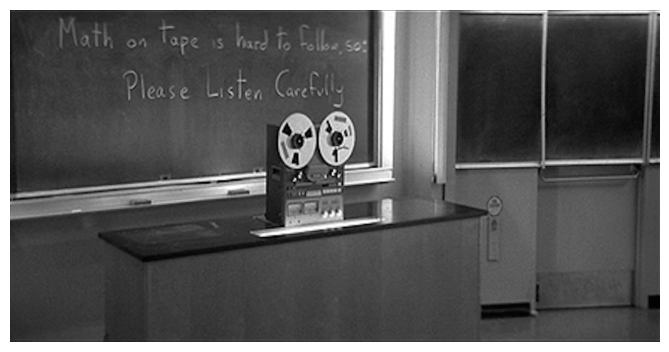

In [6]:
# Compute printed image size
im_width = 6.5
im_height = B.shape[0] * (6.5 / B.shape[1])
im_shape = (im_width, im_height)

# Display image
fig, ax = plt.subplots(figsize=im_shape, layout='constrained')
ax.set_position([0, 0, 1, 1])
ax.imshow(B, cmap='grey', )
ax.set_axis_off()
plt.show()

In [7]:
B_t = np.fft.fft2(B)  # fourier coefficients

#########################
# AUTOGRADER SUBMISSION #
#########################
A1 = B_t
print(type(A1))
print(A1.shape)

<class 'numpy.ndarray'>
(958, 1875)


### 3.b

In [8]:
# Plotting inputs
B_t_shift = np.fft.fftshift(B_t)
K_row = np.fft.fftshift(np.fft.fftfreq(B_t.shape[0]))  # row freqs
K_col = np.fft.fftshift(np.fft.fftfreq(B_t.shape[1]))  # col freqs

# Compute power spectral density
psd = np.abs(B_t_shift**2)

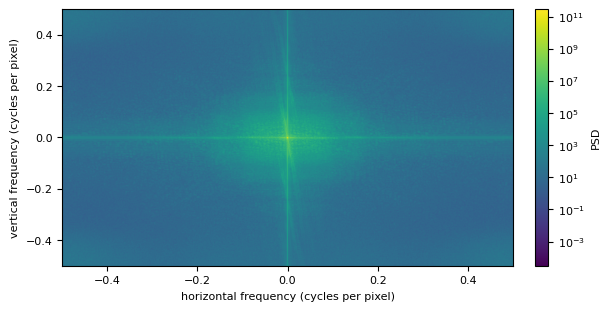

In [9]:
# Plot power spectral density
fig, ax = plt.subplots(figsize=(6, 3), layout='constrained')

im = ax.imshow(psd, norm='log', extent=(K_col[0], K_col[-1], K_row[0], K_row[-1]), aspect='auto')
fig.colorbar(im, label='PSD')
ax.set_xlabel('horizontal frequency (cycles per pixel)')
ax.set_ylabel('vertical frequency (cycles per pixel)')
fig.savefig('3bfig1.png', dpi=300)
plt.show()

### 3.c

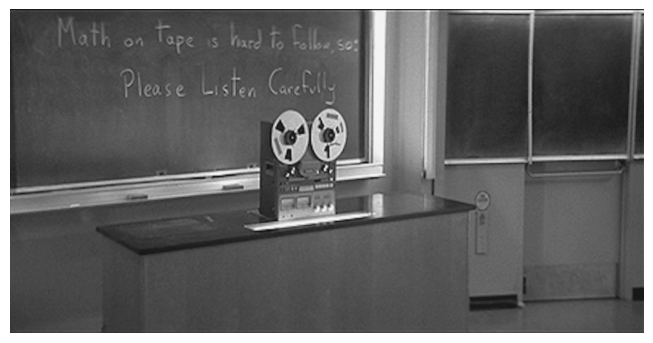

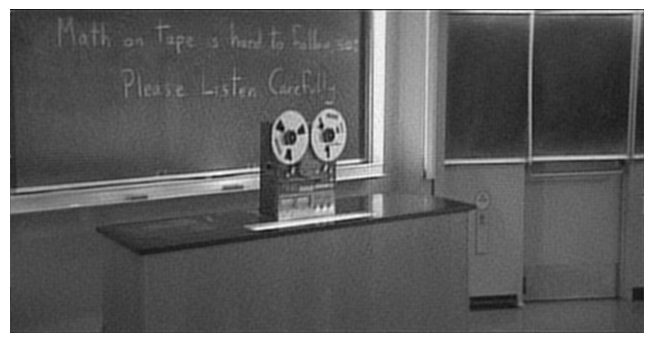

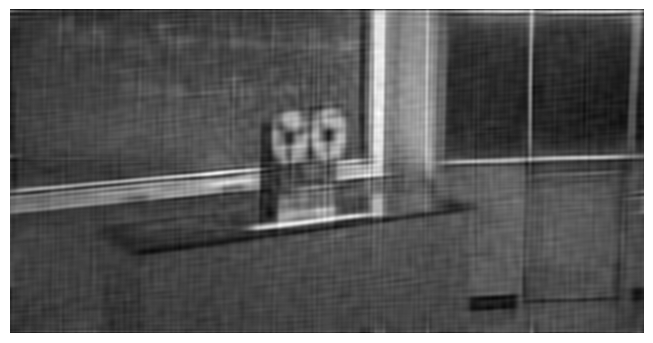

In [ ]:
# Display compressed images by truncation
B_t_sort = np.sort(np.abs(B_t.reshape(-1)))

comp_ratios = np.array([0.1, 0.01, 0.002])
B_comp_vec = np.zeros((len(comp_ratios), *B_t.shape))
for i, keep in enumerate(comp_ratios):
    N_keep = int(np.ceil(keep*len(B_t_sort)))
    thresh = B_t_sort[-N_keep]
    ind_keep = np.abs(B_t) > thresh
    B_comp_t = B_t * ind_keep
    B_comp_vec[i] = np.fft.ifft2(B_comp_t).real
    fig, ax = plt.subplots(figsize=im_shape, layout='constrained')
    ax.imshow(B_comp_vec[i], cmap='gray')
    ax.set_axis_off()
    fig.savefig(f'3cfig{i+1}.png', dpi=300)
plt.show()

### 3.e

In [37]:
# Compute compression error via Frobenius norm
error = np.zeros(comp_ratios.shape)
for i, (comp_ratio, B_comp) in enumerate(zip(comp_ratios, B_comp_vec)):
    error[i] = np.linalg.norm(B - B_comp)

#########################
# AUTOGRADER SUBMISSION #
#########################
A2 = error
print(type(A2))
print(A2.shape)

<class 'numpy.ndarray'>
(3,)


In [38]:
error

array([ 5.10581929, 32.56463164, 63.99315521])

In [35]:
error

array([ 5.10581929, 32.56463164, 63.99315521])

### 4.b

\begin{align*}
    A_k &= \frac{2}{\pi k} \sin\left(\frac{\pi k}{2}\right) \\
    B_k &= 0
\end{align*}

In [ ]:
# Compute fourier series mode coefficients
k = np.arange(1, 101)
Ak = 2/(np.pi*k)*np.sin(np.pi*k/2)
Bk = k*0

In [ ]:
# Plot fourier series mode coefficients
fig, ax = plt.subplots(figsize=(6.5, 3.5), layout='constrained')
ax.plot(k, Ak, '.', label='$A_k$')
ax.plot(k, Bk, '+', label='$B_k$')
ax.set_xlabel('$k$')
ax.set_ylabel('Mode coefficient')
ax.legend()
ax.grid(True)
fig.savefig('4bfig1.png', dpi=300)
plt.show()

### 4. c

In [ ]:
# Define square wave function
def square(x):
    return np.mod(x-1, 4) >= 2

\begin{align*}
    \hat{f}(x) &= \frac{1}{2} + \sum_{k=1}^\infty
        \frac{2}{\pi k} \sin\left(\frac{\pi k}{2}\right)
        \cos\left( \frac{\pi k}{2} x \right)
\end{align*}

In [ ]:
# Define fourier series square wave approximation function
def square_approx(x, n):
    sum = 0.5 + np.zeros(x.shape)
    for k in range(1, n+1):
        sum += 2/(np.pi*k) * np.sin(np.pi*k/2) * np.cos(np.pi*k/2*x)
    return sum

In [ ]:
# Plot square wave function
dx = 0.01
x_vec = np.arange(-2, 2+dx, dx)

fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
ax.plot(x_vec, square(x_vec), 'k--', label='truth')
ax.plot(x_vec, square_approx(x_vec, 10), label='Fourier series approx.')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.legend()
fig.savefig('4cfig1.png', dpi=300)
plt.show()